In [2]:
import ROOT as r
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import pickle
import spliland
import importlib
import random
import fclParse
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix

Welcome to JupyROOT 6.18/04


In [3]:
directory = './template_data/set_5/'

## Intro

The purpose of this notebook is to make a first attempt deep neural network sorta model with keras and tensorflow

This is just a "yes I can make **something**" sort of model, it is not serious beyond use as a teaching tool for myself. So there is no attention to nuance, I am just blindly following a tutorial to get a feel for using these tools before reading a little deeper.

Following along from here: https://www.tensorflow.org/tutorials/keras/classification

In [5]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

2020-10-06 12:39:57.096117: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/lars/root6/lib
2020-10-06 12:39:57.096803: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [110]:
with open(directory + 'x_train.data', 'rb') as xFile:
    biggestX = pickle.load(xFile)
    x_train = []
    for x in biggestX[:60000]:
        x_train.append(x[1])
    xFile.close()
    
with open(directory + 'x_test.data', 'rb') as xFile:
    biggestX = pickle.load(xFile)
    x_test = []
    for x in biggestX[:20000]:
        x_test.append(x[1])
    xFile.close()

with open(directory + 'y_train.data', 'rb') as yFile:
    biggestY = pickle.load(yFile)
    y_train = biggestY[:60000]
    yFile.close()
    
with open(directory + 'y_test.data', 'rb') as yFile:
    biggestY = pickle.load(yFile)
    y_test = biggestY[:20000]
    yFile.close()

In [111]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [119]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [120]:
model.compile(# this is how the model is updated based on the data and loss function
              optimizer = 'adam',
              # the loss function measures how accurate the model is during trianing
              # you minimize this function to 'steer' the model in the right direction
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # monitor the training and testing steps
              metrics=['accuracy'])

In [121]:
history = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 870us/step - loss: 1.5772 - accuracy: 0.3225
Epoch 2/100
1875/1875 [==============================] - 2s 871us/step - loss: 1.3830 - accuracy: 0.3808
Epoch 3/100
1875/1875 [==============================] - 2s 859us/step - loss: 1.3337 - accuracy: 0.4027
Epoch 4/100
1875/1875 [==============================] - 2s 864us/step - loss: 1.3053 - accuracy: 0.4138
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2869 - accuracy: 0.4198
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2710 - accuracy: 0.4306
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2583 - accuracy: 0.4327
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2471 - accuracy: 0.4385
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2370 - accuracy: 0.4452
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/

In [122]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

625/625 - 0s - loss: 1.0676 - accuracy: 0.5314

Test accuracy: 0.5313500165939331


Text(0, 0.5, 'loss')

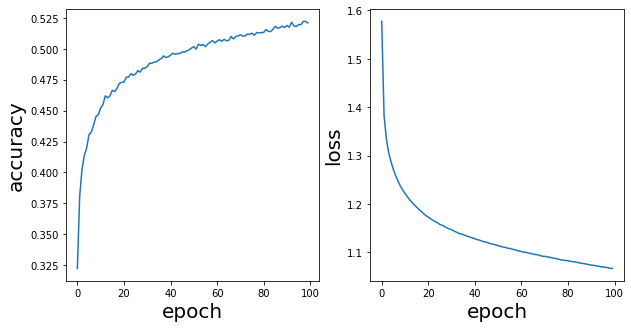

In [123]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10, 5)

ax[0].plot(history.history['accuracy'])
ax[1].plot(history.history['loss'])

ax[0].set_xlabel('epoch', fontsize=20)
ax[1].set_xlabel('epoch', fontsize=20)

ax[0].set_ylabel('accuracy', fontsize=20)
ax[1].set_ylabel('loss', fontsize=20)

In [124]:
Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)

matrix = confusion_matrix(y_test, y_pred, normalize='true')

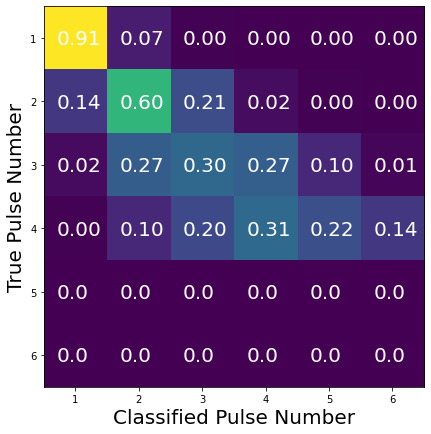

In [125]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

labels = ['1', '2', '3', '4', '5', '6']

grid = np.array(matrix)
im = ax.imshow(grid)

for k in range (0, len(grid)):
        for l in range (0, len(grid[0])):
            ax.text(l-0.3, k+0.1, str(grid[k][l])[:4], size=20, color='white')
            
ax.set_xticklabels([''] + labels);
ax.set_yticklabels([''] + labels);

ax.set_ylabel('True Pulse Number', fontsize=20);
ax.set_xlabel('Classified Pulse Number', fontsize=20);